# Linear Regression with one variable

<h4>Dataset:</h4>
        Data holds 2 columns (brain weight and body weigth)
<h4>Feature:</h4>
        Body weigth
<h4>Target:</h4>
        Brain weigth

<font color="grey">Dataset source: https://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt</font>

<h5>To do:</h5>
<ol>
    <li>Importing the dataset</li>
    <li>Select the features variable 'X' and the target variable 'y'</li>
    <li>Create the hypothesis function</li>
    <li>Find the hyperparametrs</li>
    <ol type="1">
        <li>Create the cost function</li>
        <li>Create the batch gradient descent function</li>
    </ol>
    <li>Test the model</li>
    <li>Normal Equation</li>
</ol>

In [31]:
# main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Importing dataset

In [32]:
# importing the dataset
dataset = pd.read_csv("dataset.csv")
print(dataset)

    brain weight  body weight
0          3.385         44.5
1          0.480         15.5
2          1.350          8.1
3        465.000        423.0
4         36.330        119.5
..           ...          ...
57       160.000        169.0
58         0.900          2.6
59         1.620         11.4
60         0.104          2.5
61         4.235         50.4

[62 rows x 2 columns]


In [33]:
# printing information about data
print(">>> Info: ")
dataset.info()

# describing dataset
print("\n>>> Stats: ")
print(dataset.describe())

dataset = dataset.drop(dataset[dataset["body weight"] > 4000].index)

>>> Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brain weight  62 non-null     float64
 1   body weight   62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB

>>> Stats: 
       brain weight  body weight
count     62.000000    62.000000
mean     198.789984   283.134194
std      899.158011   930.278942
min        0.005000     0.140000
25%        0.600000     4.250000
50%        3.342500    17.250000
75%       48.202500   166.000000
max     6654.000000  5712.000000


#### 2. Select the features variable 'X' and the target variable 'y'

In [34]:
# selecting feature and target variable
X = np.array(dataset["body weight"])
y = np.array(dataset["brain weight"])

print(">>> Fearture:")
print(X[:10])
print("\n>>> Target:")
print(y[:5])

>>> Fearture:
[ 44.5  15.5   8.1 423.  119.5 115.   98.2   5.5  58.    6.4]

>>> Target:
[  3.385   0.48    1.35  465.     36.33 ]


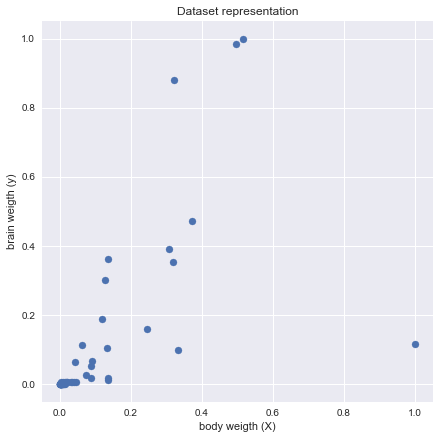

In [35]:
# plotting data
plt.style.use("seaborn")
data_frag, data_ax = plt.subplots(figsize=(7,7))
data_ax.set(
    title="Dataset representation",
    xlabel="body weigth (X)",
    ylabel="brain weigth (y)")
fX = (X - X.min()) / (X.max() - X.min())
fy = (y - y.min()) / (y.max() - y.min())
data_ax.scatter(fX, fy);
fX = np.array([np.ones(len(fX)), fX]).T

#### 3. Create the hypothesis function
Hypothesis formula:
$$
  h_\theta(x) = \theta_0 + \theta_1x
$$

In [36]:
def h(X: np.ndarray, O: np.ndarray = np.array([0, 1])) -> np.ndarray:
    """
    Predict an array of numeric value based on the data given.
    Parameters
    ----------
    X: np.ndarray(shape((m,2))
        Matrix of data
    O: np.ndarray(shape=m)
        Vector the hyperparameters
    Returns
    -------
    np.ndarray
        Vector of the predicted values
    """
    return X.dot(O)
# h(X_train[:10])

In [37]:
# test h
h(fX[:10])

array([0.03360963, 0.0116376 , 0.00603094, 0.32038246, 0.09043383,
       0.08702438, 0.07429576, 0.00406104, 0.04383798, 0.00474293])

#### 4.A. Create the cost function
Cost function formula: 
$$
    J(\theta_0,\theta_1) = \frac1{2m} \sum_{i=1}^m( h_\theta(x^{(i)}) - y^{(i)})^2
$$
<center>Where: m = size of training set</center>

In [38]:
def cost_func(X: np.ndarray, y: np.ndarray, O: np.ndarray = np.array([0, 1])) -> float:
    """
    Calculate the cost function
    Parameters
    ----------
    X: np.ndarray(shape=(m,2))
        Matrix of data
    y: np.ndarray(shape=m)
        Vector of data
    O: np.ndarray(shape=m)
        Vector the hyperparameters
    h: callable
        The hypothesis
    Returns
    -------
    float
        Average of distances between the X and y
    """
    return 0.5 * np.sum(
        np.power(
            np.subtract(h(X, O), y), 2
        )
    ).mean()

In [39]:
# test cost_func
cost_func(fX[:1], fy[:1])

0.00037046830703630674

#### 4.B. Create the batch gradient descent function
Gradient descent formula:<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
{
$$ \theta_0 := \theta_0 - \alpha \frac1m \sum_{i=1}^m( h_\theta(x^{(i)}) - y^{(i)})$$
$$ \theta_1 := \theta_1 - \alpha \frac1m \sum_{i=1}^m( h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$$
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
} repeat until convergence <br>
<center>Where: m = size of training set; $\alpha$ = learning rate; '$:=$' = assignment</center>

In [40]:
def batch_grad_des(X: np.ndarray,
                   y: np.ndarray,
                   O: np.ndarray = np.array([0, 1]),
                   alpha: int = 1,
                   nloop: int = 1000) -> (np.ndarray, np.ndarray):
    """
    Find the min of the cost function
    Parameters
    ----------
    X: np.ndarray(shape=(m,2))
        Matrix of data
    y: np.ndarray(shape=m)
        Vector of data
    O: np.ndarray(shape=m)
        Vector the hyperparameters
    alpha: int
        Learning rate (default = 1) 
    nloop: int
        Max number of loops that gradient descent will perform (default = 1000) 
    Returns
    -------
    np.ndarray
        Vector of hyperparameters
    np.ndarray
        Hyperparameters history
    """
    hO = O
    def step_size():
        return np.array([
            alpha * np.sum(
               np.subtract(h(X, O), y) * X.T[i]
            ).mean()
            for i in range(len(X[0]))
        ])
    for _ in range(nloop):
        O = np.subtract(O, step_size())
        hO  = np.append(hO, O.copy())
        
    return O, hO

In [41]:
# running gradient descent
n = 250
hyperparam, hO = batch_grad_des(fX, fy , alpha=0.01, nloop=n)
hyperparam

array([0.02065533, 0.85155913])

In [42]:
# calculating cost function for each hyperparam
hO = hO.reshape((int(len(hO)/2), 2))
jO = np.array([cost_func(fX, fy, O=o) for o in hO])
jO[:10]

array([0.88925844, 0.88742743, 0.88657824, 0.88590166, 0.88527087,
       0.88466542, 0.88408151, 0.88351792, 0.8829739 , 0.88244873])

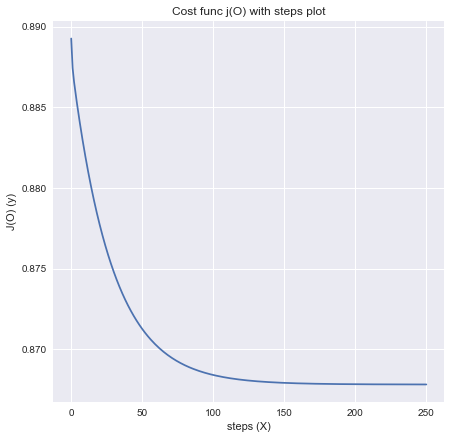

In [43]:
data_frag, data_ax = plt.subplots(figsize=(7,7))
data_ax.set(
    title="Cost func j(O) with steps plot",
    xlabel="steps (X)",
    ylabel="J(O) (y)")
data_ax.plot(np.arange(0, n + 1), jO);

#### 5. Test model

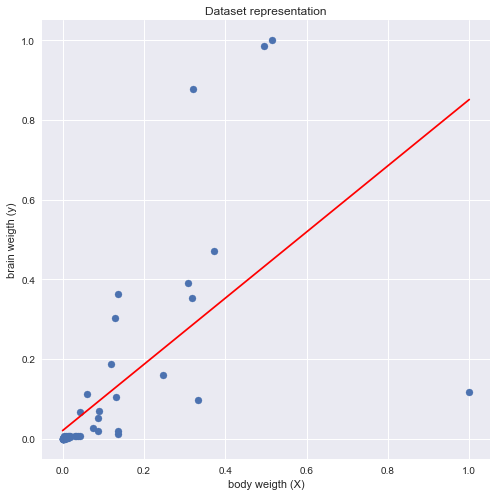

In [44]:
# regression plot
data_fig, data_ax = plt.subplots(figsize=(7,7))
data_ax.set(
    title="Dataset representation",
    xlabel="body weigth (X)",
    ylabel="brain weigth (y)")
data_ax.scatter(fX.T[1], fy)
data_ax.plot(hyperparam, 'r')
data_fig.tight_layout()

In [45]:
tmp_X = np.array([np.ones(len(X)), X]).T
result = np.array([[h(tmp_X[i], hyperparam) for i in range(len(y))], y]).T

result = pd.DataFrame(data=result, columns=["measured y", "target y"])
result

,measured y,target y
0,37.915037,3.385
1,13.219822,0.480
2,6.918284,1.350
3,360.230166,465.000
4,101.781971,36.330
5,97.949955,27.660
6,83.643762,14.830
7,4.704231,1.040
8,49.411085,4.190
9,5.470634,0.425


#### 6. Nomal equation
Normal equation formula:
$$
  \theta = (X^TX)^{-1}X^Ty
$$

In [62]:
def normal_equation(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [72]:
hyperparam2 = normal_equation(fX, fy)
hyperparam, hyperparam2

(array([0.02065533, 0.85155913]), array([0.02082768, 0.84972656]))